# PRÁCTICA FINAL: análisis álgebra lineal, regresión

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [28]:
data = pd.read_csv("/home/paty/Documentos/Maestría/Prope/practica-final-por-equipos-verano-2020-itam-patyua-master/Bases_de_datos/denuncias_2016_2019_cada_100mil.csv") 
data.head()
data.tail()

,Unnamed: 0,Unnamed: 0.1,anio,alcaldia,numero_denuncias,poblacion,pobreza,denuncias_100mil_habitantes
59,59,59,2019,MILPA ALTA,413,130582,49.2,316.276363
60,60,60,2019,TLAHUAC,1068,360265,39.2,296.448448
61,61,61,2019,TLALPAN,1891,650567,32.1,290.669524
62,62,62,2019,VENUSTIANO CARRANZA,1570,430978,22.8,364.287736
63,63,63,2019,XOCHIMILCO,1184,415007,40.5,285.296393


### Algunos datitos...

In [24]:
n=np.size(data)
n

512

**Tenemos un total de 512 observaciones.**

In [22]:
np.mean(data.numero_denuncias)

1292.21875

**Podemos ver que hay un promedio de 1292 carpetas de investigación por el delito de violencia en el hogar, por alcaldía en cada mes. Es un dato muy elevado, aunque al tomar datos desde el 2016 estamos haciendo conclusiones apresuradas.**

In [25]:
#Hacemos un primer saque de OLS con statsmodel:

fit = ols("denuncias_100mil_habitantes ~ C(alcaldia) + pobreza", data=data).fit()
fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     denuncias_100mil_habitantes   R-squared:                       0.542
Model:                                     OLS   Adj. R-squared:                  0.398
Method:                          Least Squares   F-statistic:                     3.781
Date:                         Sun, 19 Jul 2020   Prob (F-statistic):           0.000221
Time:                                 02:35:39   Log-Likelihood:                -329.11
No. Observations:                           64   AIC:                             690.2
Df Residuals:                               48   BIC:                             724.8
Df Model:                                   15                                         
Covariance Type:                     nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               159.7876     16.174      9.879      0.000     127.268     192.307
C(alcaldia)[T.AZCAPOTZALCO]              32.9188     31.165      1.056      0.296     -29.743      95.580
C(alcaldia)[T.BENITO JUAREZ]             45.9574     25.541      1.799      0.078      -5.396      97.311
C(alcaldia)[T.COYOACAN]                  22.6622     31.266      0.725      0.472     -40.202      85.527
C(alcaldia)[T.CUAJIMALPA DE MORELOS]    -14.6925     34.442     -0.427      0.672     -83.943      54.558
C(alcaldia)[T.CUAUHTEMOC]               129.9102     29.948      4.338      0.000      69.695     190.125
C(alcaldia)[T.GUSTAVO A MADERO]         -18.6631     33.953     -0.550      0.585     -86.931      49.604
C(alcaldia)[T.IZTACALCO]                145.1271     30.339      4.784      0.000      84.127     206.128
C(alcaldia)[T.IZTAPALAPA]                -8.0473     35.784     -0.225      0.823     -79.996      63.901
C(alcaldia)[T.LA MAGDALENA CONTRERAS]    96.4066     35.139      2.744      0.009      25.755     167.058
C(alcaldia)[T.MIGUEL HIDALGO]             7.3813     26.463      0.279      0.782     -45.827      60.589
C(alcaldia)[T.MILPA ALTA]                -6.7729     39.180     -0.173      0.863     -85.549      72.003
C(alcaldia)[T.TLAHUAC]                   12.8900     36.860      0.350      0.728     -61.221      87.002
C(alcaldia)[T.TLALPAN]                   27.3586     35.002      0.782      0.438     -43.017      97.734
C(alcaldia)[T.VENUSTIANO CARRANZA]       71.8665     32.247      2.229      0.031       7.031     136.703
C(alcaldia)[T.XOCHIMILCO]                17.3802     37.180      0.467      0.642     -57.375      92.135
pobreza                                   1.8280      0.560      3.263      0.002       0.702       2.954
==============================================================================
Omnibus:                        6.212   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.039
Skew:                           0.699   Prob(JB):                       0.0488
Kurtosis:                       2.445   Cond. No.                     1.76e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Con este paquete estamos realizando una primer aproximación, automáticamente identifica las variables dicotómicas y la convierte en 0's y 1's, sin embargo es mas dificil de manipular si nosotrxs quisieramos ver una alcaldía en específico o realizar otras comparaciones.**

In [11]:
#Lo haremos con Pandas para poder graficar resultados y compararlos
#convertimos las variables categóricas a dummies
df = pd.get_dummies(data)
df

,Unnamed: 0,Unnamed: 0.1,anio,numero_denuncias,poblacion,pobreza,denuncias_100mil_habitantes,alcaldia_ALVARO OBREGON,alcaldia_AZCAPOTZALCO,alcaldia_BENITO JUAREZ,...,alcaldia_GUSTAVO A MADERO,alcaldia_IZTACALCO,alcaldia_IZTAPALAPA,alcaldia_LA MAGDALENA CONTRERAS,alcaldia_MIGUEL HIDALGO,alcaldia_MILPA ALTA,alcaldia_TLAHUAC,alcaldia_TLALPAN,alcaldia_VENUSTIANO CARRANZA,alcaldia_XOCHIMILCO
0,0,0,2016,1330,727034,27.9,182.935048,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2016,794,414711,19.5,191.458630,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2016,729,385439,5.0,189.134986,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,2016,1276,620416,19.8,205.668455,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2016,280,186391,30.1,150.221845,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,59,2019,413,130582,49.2,316.276363,0,0,0,...,0,0,0,0,0,1,0,0,0,0
60,60,60,2019,1068,360265,39.2,296.448448,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61,61,61,2019,1891,650567,32.1,290.669524,0,0,0,...,0,0,0,0,0,0,0,1,0,0
62,62,62,2019,1570,430978,22.8,364.287736,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,anio,numero_denuncias,poblacion,pobreza,denuncias_100mil_habitantes,alcaldia_ALVARO OBREGON,alcaldia_AZCAPOTZALCO,alcaldia_BENITO JUAREZ,...,alcaldia_GUSTAVO A MADERO,alcaldia_IZTACALCO,alcaldia_IZTAPALAPA,alcaldia_LA MAGDALENA CONTRERAS,alcaldia_MIGUEL HIDALGO,alcaldia_MILPA ALTA,alcaldia_TLAHUAC,alcaldia_TLALPAN,alcaldia_VENUSTIANO CARRANZA,alcaldia_XOCHIMILCO
count,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,31.500000,31.500000,2017.500000,1292.218750,5.531925e+05,26.393750,243.139756,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
std,18.618987,18.618987,1.126872,877.502001,4.086664e+05,11.755578,61.638354,0.243975,0.243975,0.243975,...,0.243975,0.243975,0.243975,0.243975,0.243975,0.243975,0.243975,0.243975,0.243975,0.243975
min,0.000000,0.000000,2016.000000,236.000000,1.305820e+05,5.000000,150.221845,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,15.750000,2016.750000,786.250000,3.697330e+05,18.900000,198.508462,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.500000,31.500000,2017.500000,1126.000000,4.148590e+05,28.150000,228.905019,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.250000,47.250000,2018.250000,1543.000000,6.279538e+05,33.200000,285.470571,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,63.000000,63.000000,2019.000000,4636.000000,1.815786e+06,49.200000,405.015879,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelo de regresión lineal:

In [26]:
y = df["denuncias_100mil_habitantes"]
x = df[["pobreza", "poblacion","alcaldia_ALVARO OBREGON", "alcaldia_AZCAPOTZALCO", "alcaldia_BENITO JUAREZ", "alcaldia_IZTAPALAPA","alcaldia_IZTACALCO", "alcaldia_MILPA ALTA", "alcaldia_GUSTAVO A MADERO", "alcaldia_TLALPAN", "alcaldia_LA MAGDALENA CONTRERAS", "alcaldia_MIGUEL HIDALGO", "alcaldia_TLAHUAC","alcaldia_VENUSTIANO CARRANZA", "alcaldia_XOCHIMILCO"]]
x = sm.add_constant(x)

In [30]:
model = sm.OLS(y,x)
fitted = model.fit()
print(fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:     denuncias_100mil_habitantes   R-squared:                       0.542
Model:                                     OLS   Adj. R-squared:                  0.398
Method:                          Least Squares   F-statistic:                     3.781
Date:                         Sun, 19 Jul 2020   Prob (F-statistic):           0.000221
Time:                                 02:40:44   Log-Likelihood:                -329.11
No. Observations:                           64   AIC:                             690.2
Df Residuals:                               48   BIC:                             724.8
Df Model:                                   15                                         
Covariance Type:                     nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

...

Podemos observar en esta regresión una correlación del 54% entre las variables dependientes que elegimos con las alcaldías, la pobreza y la población. Tomamos la variables de población únicamente como control para no sobre estimar aquellas alcaldías que estén muy pobladas o subestimar los datos de las alcadías poco pobladas como Milpa Alta. 

Hay algunos resultados sorprendentes, llama la atención que la pobreza tiene una relación negativa y significativa con las carpetas de investigación, esto quiere decir que a medida que aumenta la pobreza, habría menores carpetas de investigación, esto puede tener varias explicaciones sin embargo nos detendremos en esas conclusiones en el análisis final. Para poder visualizar que está ṕasando con las alcaldías haremos unas visualizaciones:

...

In [20]:
cols = x.columns.tolist()

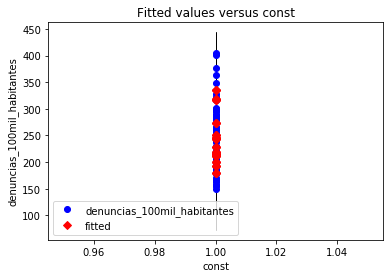

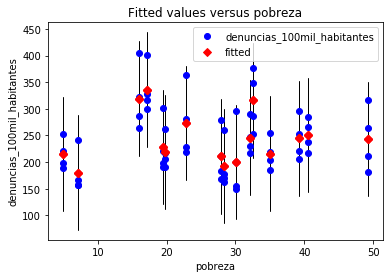

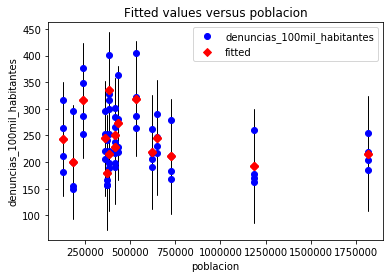

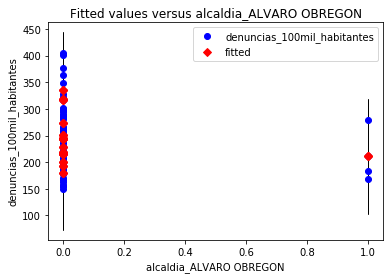

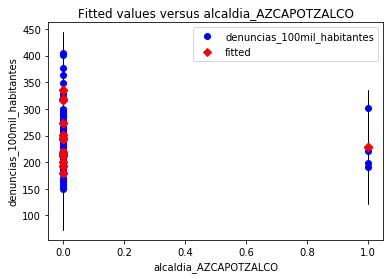

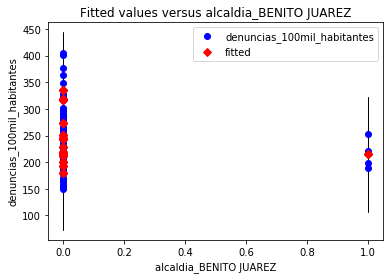

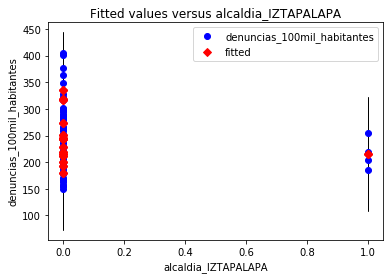

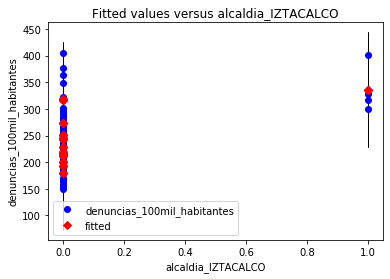

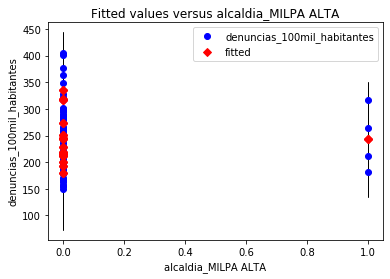

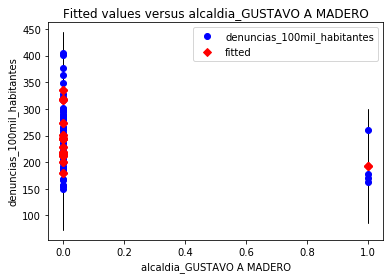

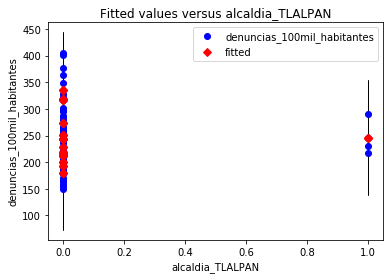

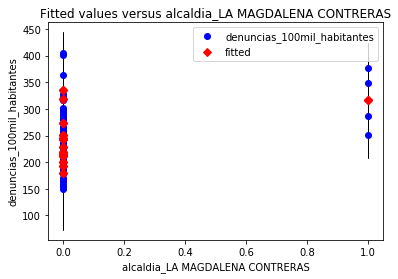

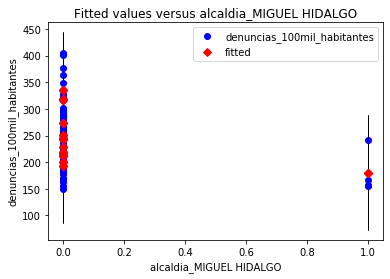

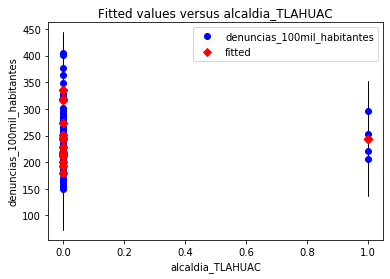

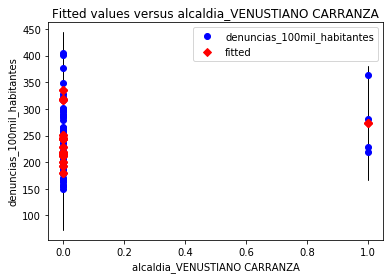

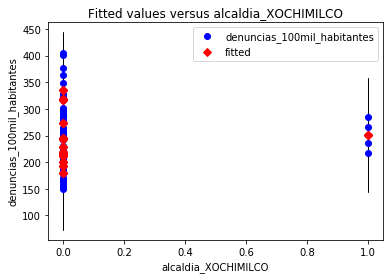

In [32]:
for col in cols:
    sm.graphics.plot_fit(fitted,col)

...
Datos relevantes:

Vemos que existen delegaciones que sobresalen por un mayor o menor número de carpetas. La delegación Iztacalco y Magdalena contreras sobresalen por su alto índice de carpetas abiertas por violencia en el hogar. Algunas delegaciones que presentan resultados menores a la media son Gustavo A Madero y Miguel Hidalgo. 

El número de carpetas abiertas no tiene una relación directa con incidencia delictiva, de hecho, lo que se espera es que se denuncien con mayor frecuencia delitos como la violencia familiar que comunmente no llegan a instancias de procuración de justicia. 
